https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4 <br>
https://www.kaggle.com/competitions/titanic/data

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df = pd.read_csv('titanic/train.csv')
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(how='any', inplace=True)
# x_train, y_train = df.drop('Survived', axis=1).values, df['Survived'].values

# Copia o dataframe e separa X e y
X = df.drop('Survived', axis=1).copy()
y = df['Survived'].values

# Aplica LabelEncoder automaticamente nas colunas categóricas
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Converte para numpy array
x_train = X.values
y_train = y

In [2]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz

decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree = decision_tree.fit(x_train, y_train)

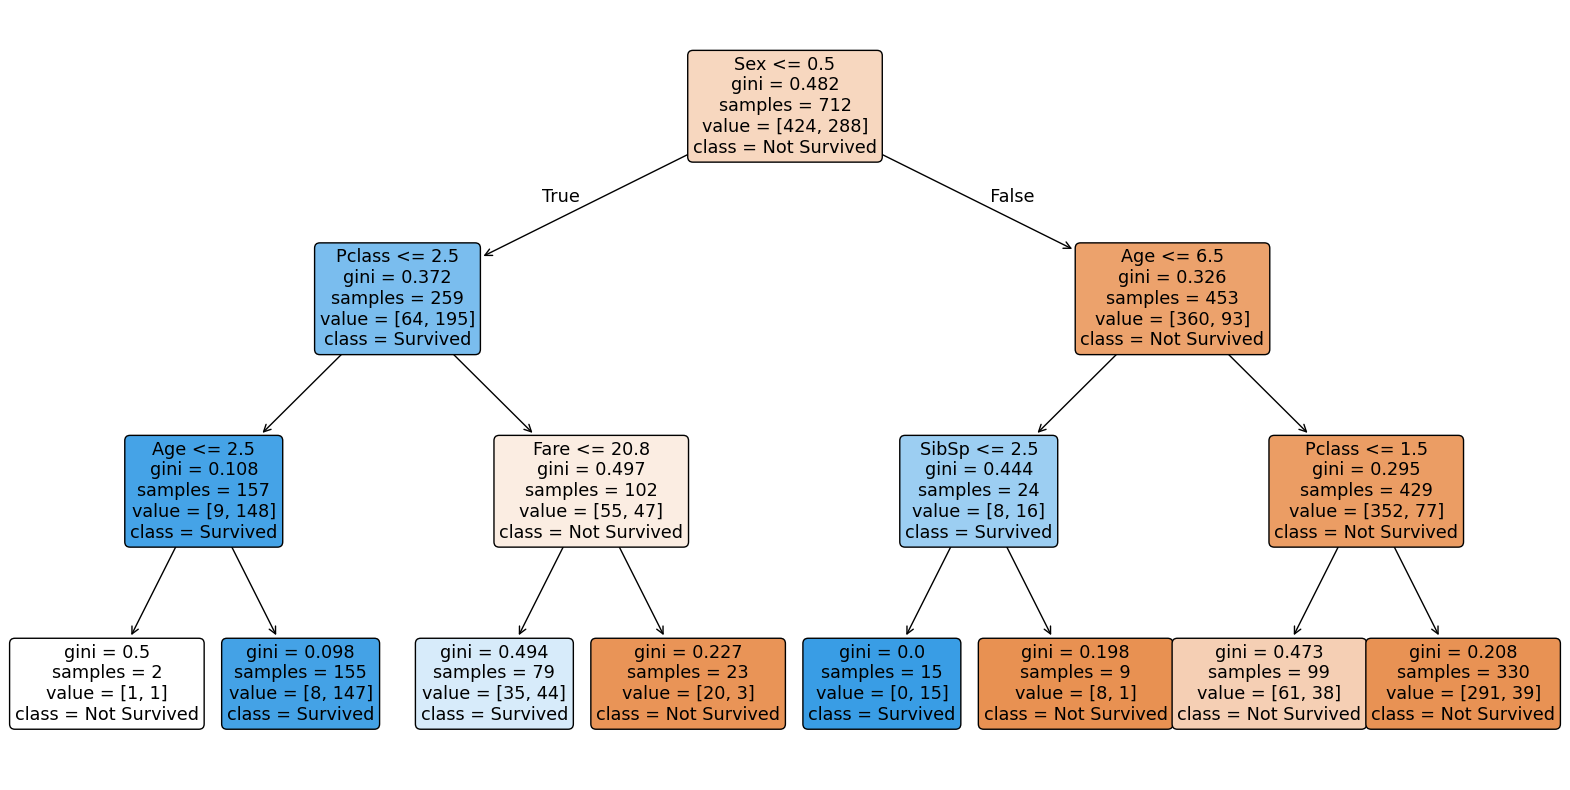

In [4]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
	decision_tree,
	feature_names=X.columns,
	class_names=['Not Survived', 'Survived'],
	filled=True,
	rounded=True
)
plt.show()